# Tratando Missing Data

# Importando bibliotecas

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importando o dataset ames no qual já tratei outliers:

In [62]:
df = pd.read_csv("../data_input/ames_tratado_outliers.csv")

In [63]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

### Nota:

###### Estou escrevendo estes notebooks para disponibilizar no portfolio, depois de já ter escrito muitos notebooks com este dataset. Assim, já tenho um certo conhecimento sobre as features do dataset, porém, é claro que tudo isto é feito, no mínimo, com a descrição de cada campo em aberto. O arquivo contendo a descrição que está lá no kaggle está aqui: [ames_data_description.txt](ames_data_description.txt).

### O campo PID é um identificador único (eu sei porque vi no arquivo de descrição dos campos) e aqui já temos um índice. Assim, removo o PID:

In [65]:
df = df.drop('PID', axis=1)

### Campos NaN

In [66]:
df.isnull()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2923,False,False,True,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2924,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2925,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [67]:
df.isnull().sum().sort_values()

MS SubClass          0
Sale Condition       0
Central Air          0
1st Flr SF           0
2nd Flr SF           0
                  ... 
Fireplace Qu      1422
Fence             2355
Alley             2729
Misc Feature      2822
Pool QC           2915
Length: 80, dtype: int64

In [68]:
percentagem_nan = (100* df.isnull().sum() / len(df)).sort_values()
percentagem_nan

MS SubClass        0.000000
Sale Condition     0.000000
Central Air        0.000000
1st Flr SF         0.000000
2nd Flr SF         0.000000
                    ...    
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
Length: 80, dtype: float64

### Agora, começarei a atribuir alguns valores.. dropar linhas.. ou mesmo excluir colunas..

###### Lembre que este é um simples estudo. Eu vou levar em consideração alguns aspectos importantes, como: a) me atentar para a descrição da coluna e tentar inferir se dados faltantes nesta coluna poderiam ser preenchidos com 'null', por exemplo... b) tentar inferir valores com base nas casas na mesma vizinhança .. Enfim, é um estudo realizado por um leigo e não visa colocar um modelo de Machine Learning em produção.

## Analisando as colunas relativas ao Porão (Basement):

In [69]:
percentagem_nan[percentagem_nan < 1].sort_values(ascending=False).head(12)

Mas Vnr Type      0.785787
Mas Vnr Area      0.785787
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
Electrical        0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Lot Area          0.000000
dtype: float64

### Aqui, preencherei as colunas relativas ao Porão (Basement) com os valores com 0 ou None (a depender se a colunas é string ou número). Isso porque, informações faltantes, aqui, podem indicar que Não Existe Porão na dada casa.

###### Para saber o tipo de dado da coluna em específico, olho o [ames_data_description.txt](ames_data_description.txt). As informações relativas ao Porão estão nas linhas: 279, 288, 297, 305, 315, 317, 327, 329, 331, 371 e 373. Assim, são 12 colunas ao total:

In [70]:
porao_colunas_numericas = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[porao_colunas_numericas] = df[porao_colunas_numericas].fillna(0)

In [71]:
porao_colunas_string =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[porao_colunas_string] = df[porao_colunas_string].fillna('None')

In [72]:
percentagem_nan = (100* df.isnull().sum() / len(df)).sort_values()
percentagem_nan[percentagem_nan < 1].sort_values(ascending=False).head(12)

Mas Vnr Type    0.785787
Mas Vnr Area    0.785787
Electrical      0.034165
Garage Area     0.034165
Garage Cars     0.034165
Neighborhood    0.000000
House Style     0.000000
Bldg Type       0.000000
Condition 2     0.000000
Condition 1     0.000000
BsmtFin SF 1    0.000000
Utilities       0.000000
dtype: float64

## Drapna

#### Vou simplesmente dropar as linhas que possuem 'Electrical' e 'Garage Cars' nulos. Isso porque são pouquíssimos dados:

In [73]:
df = df.dropna(axis=0, subset=['Electrical', 'Garage Cars'])

In [74]:
percentagem_nan = (100* df.isnull().sum() / len(df)).sort_values()
percentagem_nan[percentagem_nan < 1].sort_values(ascending=False).head(12)

Mas Vnr Area      0.786325
Mas Vnr Type      0.786325
Lot Config        0.000000
Bldg Type         0.000000
BsmtFin Type 2    0.000000
Condition 2       0.000000
Condition 1       0.000000
Neighborhood      0.000000
Land Slope        0.000000
Utilities         0.000000
Overall Qual      0.000000
Land Contour      0.000000
dtype: float64

### Analisando as coluans relativas ao acabamento externo (Mas Vnr):

###### Eu acho que é isso -> "acabamento de alvenaria".

#### Faço o mesmo que fiz com o Porão -> vejo o tipo de dado no [ames_data_description.txt](ames_data_description.txt). Então, prencho com None ou 0:

In [75]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [76]:
percentagem_nan = (100* df.isnull().sum() / len(df)).sort_values()
percentagem_nan[percentagem_nan < 1].sort_values(ascending=False).head(12)

MS SubClass       0.0
Land Slope        0.0
House Style       0.0
Bldg Type         0.0
BsmtFin Type 2    0.0
Condition 2       0.0
Condition 1       0.0
Neighborhood      0.0
Lot Config        0.0
Heating QC        0.0
Utilities         0.0
Land Contour      0.0
dtype: float64

# Até aqui, eu trabalhei com os dados em que a porcentagem de isnull eram menores do que 1%.

#####  Ou seja, somente trabalhei com aqueles dados que estavam faltando pouquíssimas informações. Assim, por exemplo, dropar as linhas era uma opção "simples", porque envolvia poucas quantidades de linhas.

# Agora, vou analisar os dados restantes e ver o que dá para fazer:

In [77]:
percentagem_nan = (100* df.isnull().sum() / len(df)).sort_values()
percentagem_nan[percentagem_nan > 1].sort_values(ascending=False)

Pool QC          99.589744
Misc Feature     96.410256
Alley            93.230769
Fence            80.478632
Fireplace Qu     48.547009
Lot Frontage     16.752137
Garage Qual       5.401709
Garage Finish     5.401709
Garage Yr Blt     5.401709
Garage Cond       5.401709
Garage Type       5.367521
dtype: float64

### Vou começar analisando os dados que possuem menos valores nulos, dentre aqueles que mais possuem valores nulos. ;)

### Ou seja, dados relativo a Garagem.

In [78]:
# Preencho com 'None' os dados de Garagem que são strings:

garagem_colunas_string = ['Garage Qual', 'Garage Finish', 'Garage Cond', 'Garage Type']
df[garagem_colunas_string] = df[garagem_colunas_string].fillna('None')

In [79]:
# Preencho com 0 a única coluna sobre Garagem que é numérica, ou seja,
# a quantos anos ela foi contruída:

df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

### Agora, espero que ao ver a porcentagem de dados nulos, não retorne nada relativo a "Garagem":

In [80]:
percentagem_nan = (100* df.isnull().sum() / len(df)).sort_values()
percentagem_nan[percentagem_nan > 1].sort_values(ascending=False)

Pool QC         99.589744
Misc Feature    96.410256
Alley           93.230769
Fence           80.478632
Fireplace Qu    48.547009
Lot Frontage    16.752137
dtype: float64

## Ufa .... ;))))))))))))))))))))))))))

## Dropando algumas colunas... ;(

#### Este é um dataset de estudos e a primeira vez que rodei meu Modelo de Machine Learning, eu não havia dropado nenhuma coluna. Eu havia tentado preenchê-las o máximo possível. Comparei os resultados com outros do kaggle e estava tudo "aceitável". Depois, resolvi excluir algumas colunas (as quais eu mostro aqui) e tive uma pequena melhora nos resultados.

In [81]:
percentagem_nan = (100* df.isnull().sum() / len(df)).sort_values()
percentagem_nan[percentagem_nan > 1].sort_values(ascending=False)

Pool QC         99.589744
Misc Feature    96.410256
Alley           93.230769
Fence           80.478632
Fireplace Qu    48.547009
Lot Frontage    16.752137
dtype: float64

### Drop das colunas que possuem mais de 80% de dados faltantes, ou seja: 'Pool QC', 'Misc Feature', 'Alley' e 'Fence'.

In [82]:
df = df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis=1)

In [83]:
percentagem_nan = (100* df.isnull().sum() / len(df)).sort_values()
percentagem_nan[percentagem_nan > 1].sort_values(ascending=False)

Fireplace Qu    48.547009
Lot Frontage    16.752137
dtype: float64

# NOTA IMPORTANTE SOBRE A ORIGINALIDADE DO TRATAMENTO DE 'Fireplace Qu' e 'Lot Frontage':

###### Não é de minha autoria a ideia do tratamento que farei a seguir. 

###### 'Fireplace Qu'
###### Anteriormente, preenchi dados do tipo string com None. Porém, até então, a quantidade de dados vazios que eu estava lidando, eram mínimas. Assim, fiquei em dúvida se eu poderia proceder da mesma forma com a coluna 'Fireplace Qu'. Eu imaginei que não haveria problema, pois pode ser que as casas não tenham Lareiras e por isso havia tantos dados faltantes. Procurei no próprio kaggle como outras pessoas haviam procedido com esta coluna e descobri que "era ok" (outras pessoas o fizeram - talvez, isso por si só não garanta que "seja ok", mas...) atribuir Nulo, mesmo para uma grande quantidade de linhas.

###### 'Lot Frontage'
###### Esta coluna foi a que mais me deixou perdido. Na primeira vez, completei com a média dos valores, mas não funcionou. Procurei no kaggle, também, como outras pessoas haviam tratado esta coluna e copiei a ideia. Basicamente, o valor de 'Lot Frontage' foi atribuído com base nos valores de outras casas na mesma vizinhança. Eu não consegui pensar nesta solução por mim mesmo. ;( .. Porém, parece uma boa solução e como a implementei pode ser visto a seguir.

## Lidando com 'Fireplace Qu' (Lareiras):

### Preenchendo com None:

In [84]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

In [85]:
percentagem_nan = (100* df.isnull().sum() / len(df)).sort_values()
percentagem_nan[percentagem_nan > 1].sort_values(ascending=False)

Lot Frontage    16.752137
dtype: float64

## Lidando com 'Fireplace Qu' (Lareiras):

##### Neighborhood -> É o bairro.
##### LotFrontage -> É a distância entre os limites da rua e o início da construção. Aqui no Brasil, varia de acordo com o plano diretor do Município, mas desde que sigamos o plano diretor do Município, podemos fazer o que quisermos. Assim, aqui no Brasil, as construções uma ao lado da outra, não necessariamente possuem grande semelhança. Pelo pouco que entendo, nos EUA, em muitos bairros e ou condomínios existem, também, padrões de construção para aquele local em específico. Assim, o recuo na frente do terreno, a altura do muro (e se pode ter muro), por exemplo, penso que obedecem legislação municipal, bem como as "regras do bairro e/ou condomínio" onde aquela construção está inserida.

### Boxplot:

<AxesSubplot: xlabel='Lot Frontage', ylabel='Neighborhood'>

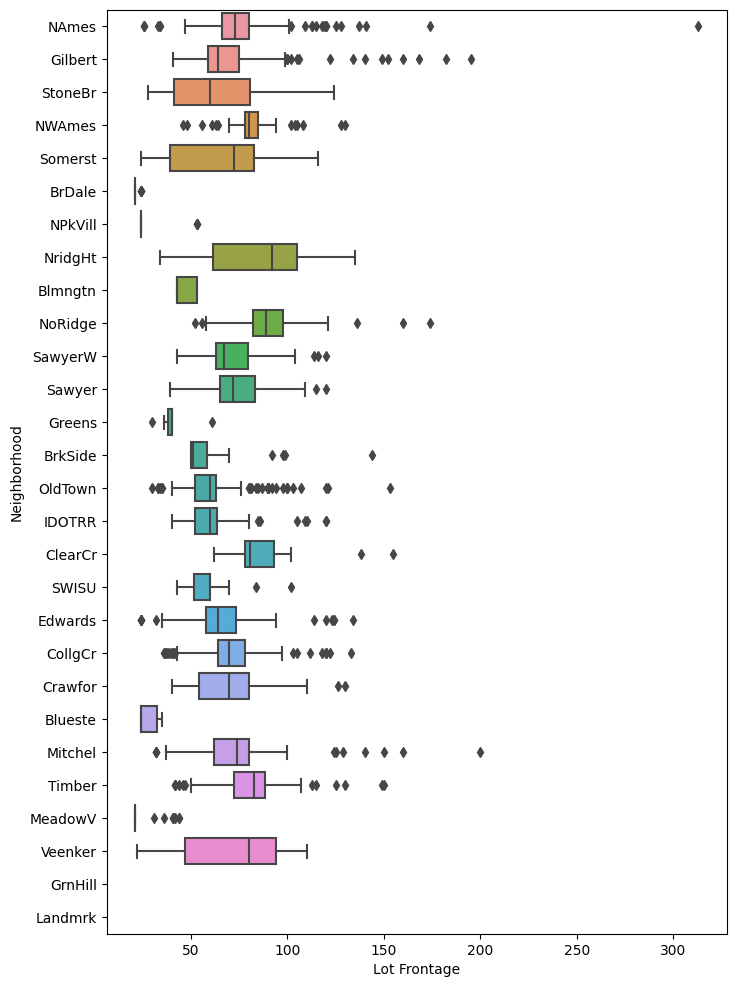

In [86]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage', y='Neighborhood', data=df)

### groupby para descobrir a média dos valores de Lot Frontage, agrupados por bairro:

In [87]:
df.groupby('Neighborhood')['Lot Frontage'].mean().sort_values(ascending=False)

Neighborhood
NoRidge    91.629630
ClearCr    88.150000
NridgHt    84.184049
NWAmes     81.517647
Timber     81.303571
NAmes      75.210667
Mitchel    75.144444
Sawyer     74.551020
Gilbert    74.207207
Veenker    72.000000
CollgCr    71.336364
SawyerW    70.669811
Crawfor    69.951807
Edwards    64.794286
Somerst    64.549383
IDOTRR     62.383721
StoneBr    62.173913
OldTown    61.777293
SWISU      59.068182
BrkSide    55.789474
Blmngtn    46.900000
Greens     41.000000
NPkVill    28.142857
Blueste    27.300000
MeadowV    25.606061
BrDale     21.500000
GrnHill          NaN
Landmrk          NaN
Name: Lot Frontage, dtype: float64

## Utilizando groupby e transform para preencher os dados com a média. 

##### Depois de alguns testes com dataset menor e utilizando [ESTA](https://www.statology.org/pandas-groupby-transform/) referência, cheguei na equação para obter o valor médio e preenchê-lo na coluna Los Frontage:

In [88]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [89]:
percentagem_nan = (100* df.isnull().sum() / len(df)).sort_values()
percentagem_nan[percentagem_nan > 1].sort_values(ascending=False)


Series([], dtype: float64)

### Apanhei bastante e descobri que existem dados faltantes ainda:

In [90]:
percentagem_nan.sort_values(ascending=False)

Lot Frontage      0.102564
Utilities         0.000000
Sale Condition    0.000000
Year Built        0.000000
MS Zoning         0.000000
                    ...   
Pool Area         0.000000
Misc Val          0.000000
Mo Sold           0.000000
Yr Sold           0.000000
Total Bsmt SF     0.000000
Length: 76, dtype: float64

###### Os preencho:

In [91]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

### Salvo o dataset, agora, com o tratamento dos outliers e missing data realizados:

In [92]:
df.to_csv("../data_output/ames_tratado_outliers_missing_data.csv", index=False)
df.to_csv("../data_input/ames_tratado_outliers_missing_data.csv", index=False)